In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode()
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

Output hidden; open in https://colab.research.google.com to view.

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

majors = pd.read_csv("/content/drive/MyDrive/Mineria/majors.csv")
names = pd.read_csv("/content/drive/MyDrive/Mineria/names.csv")

Mounted at /content/drive/


In [4]:
majors.head(20)
names.head()

,Name,Role
0,Emily,Student
1,Zoe,Student
2,Michelle,Student
3,JAMES,Student
4,Jenny,Student


In [5]:
# Normalizar nombres
names['Name'] = names['Name'].str.lower()

# Eliminar registros erróneos
names = names[names['Role'] != "#REF!"]
majors = majors[majors['Terms in Attendance'] != "#REF!"]

In [6]:
names.describe()
majors.describe()

# Especialidades más frecuentes
majors_count = majors['Majors'].value_counts().sort_values(ascending=False).to_frame().head(20)

Text(0.5, 1.0, 'Nro. de alumnos por especialidad')

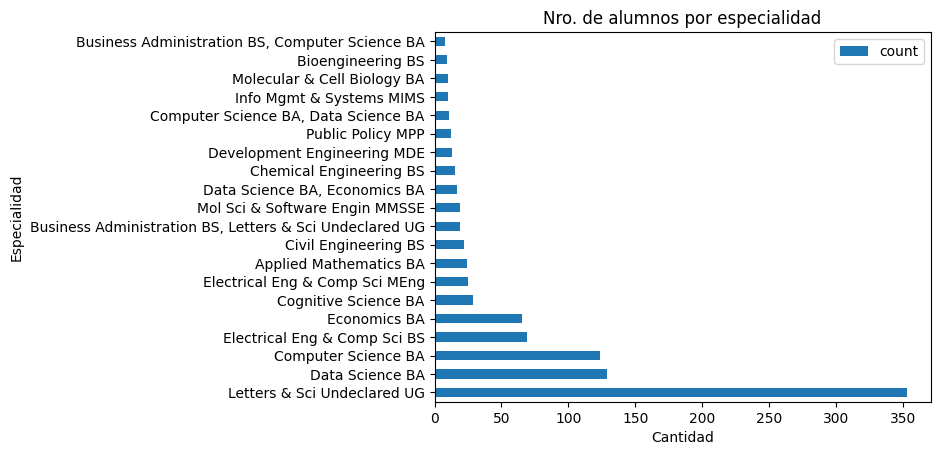

In [7]:
majors_count.plot(kind='barh')
plt.xlabel('Cantidad')
plt.ylabel('Especialidad')
plt.title('Nro. de alumnos por especialidad')

In [8]:
import urllib.request
import os.path
import zipfile

# Descargar datos de nombres de bebés
data_url = "https://www.ssa.gov/oact/babynames/names.zip"
local_filename = "babynames.zip"
if not os.path.exists(local_filename):
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

# Procesar datos
babynames = []
with zipfile.ZipFile(local_filename, "r") as zf:
    data_files = [f for f in zf.filelist if f.filename[-3:] == "txt"]
    def extract_year_from_filename(fn):
        return int(fn[3:7])
    for f in data_files:
        year = extract_year_from_filename(f.filename)
        with zf.open(f) as fp:
            df = pd.read_csv(fp, names=["Name", "Sex", "Count"])
            df["Year"] = year
            babynames.append(df)
babynames = pd.concat(babynames)

# Normalizar nombres
babynames['Name'] = babynames['Name'].str.lower()

<ipython-input-9-83f03200f30d>:1: FutureWarning:

The provided callable <function sum at 0x78caf89b02c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Text(0.5, 1.0, 'Total de niños por año')

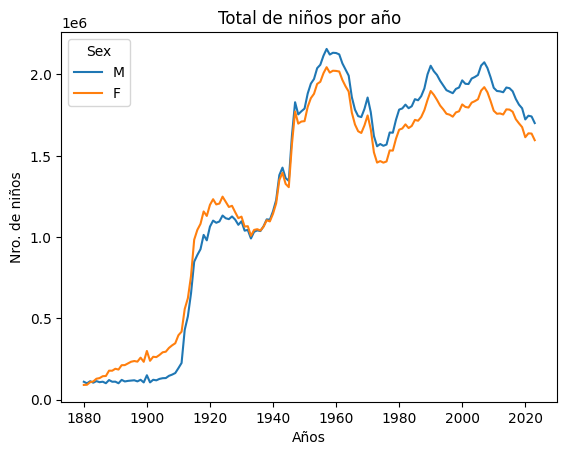

In [9]:
year_sex = pd.pivot_table(
    babynames,
    index=['Year'],
    columns=['Sex'],
    values='Count',
    aggfunc=np.sum,
)[["M", "F"]]

year_sex.plot(kind='line')
plt.xlabel('Años')
plt.ylabel('Nro. de niños')
plt.title('Total de niños por año')

Text(0.5, 1.0, 'Nombres únicos por año')

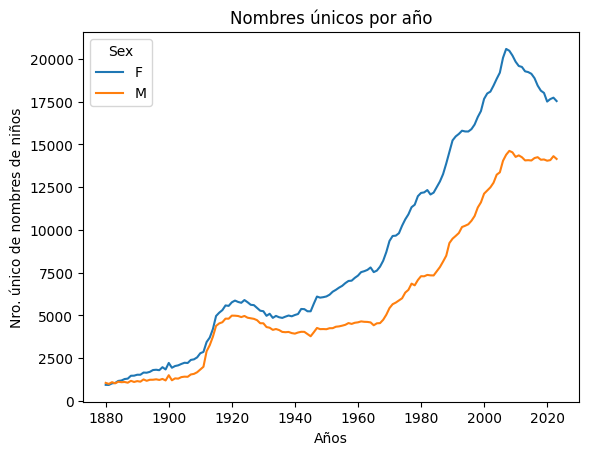

In [10]:
year_sex_unique = pd.pivot_table(
    babynames,
    index=['Year'],
    columns=['Sex'],
    values='Name',
    aggfunc=lambda x: len(np.unique(x)),
)
year_sex_unique.plot(kind='line')
plt.xlabel('Años')
plt.ylabel('Nro. único de nombres de niños')
plt.title('Nombres únicos por año')